In [60]:
import pandas as pd

In [4]:
import numpy as np

In [61]:
data = pd.read_csv("diamonds_train.csv") 
#We import the data

In [ ]:
#1. Basic data checking

In [ ]:
#display(data)
# We take a look at the dataframe

In [7]:
data.info()
# We see aggregated info for the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [8]:
data.describe()
# We analyse basic statistics for the numerical variables

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [9]:
data.isnull()
# We check null values

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
40450,False,False,False,False,False,False,False,False,False,False
40451,False,False,False,False,False,False,False,False,False,False
40452,False,False,False,False,False,False,False,False,False,False
40453,False,False,False,False,False,False,False,False,False,False


In [63]:
valid_values=data[(data["x"]>0)&(data["y"]>0)&(data["z"]>0)&(data["carat"]>0)&(data["depth"]>0)&(data["table"]>0&(data["price"]>0))]

In [64]:
display(valid_values)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


carat       AxesSubplot(0.125,0.657941;0.227941x0.222059)
depth    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
table    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
price       AxesSubplot(0.125,0.391471;0.227941x0.222059)
x        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
y        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
z              AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

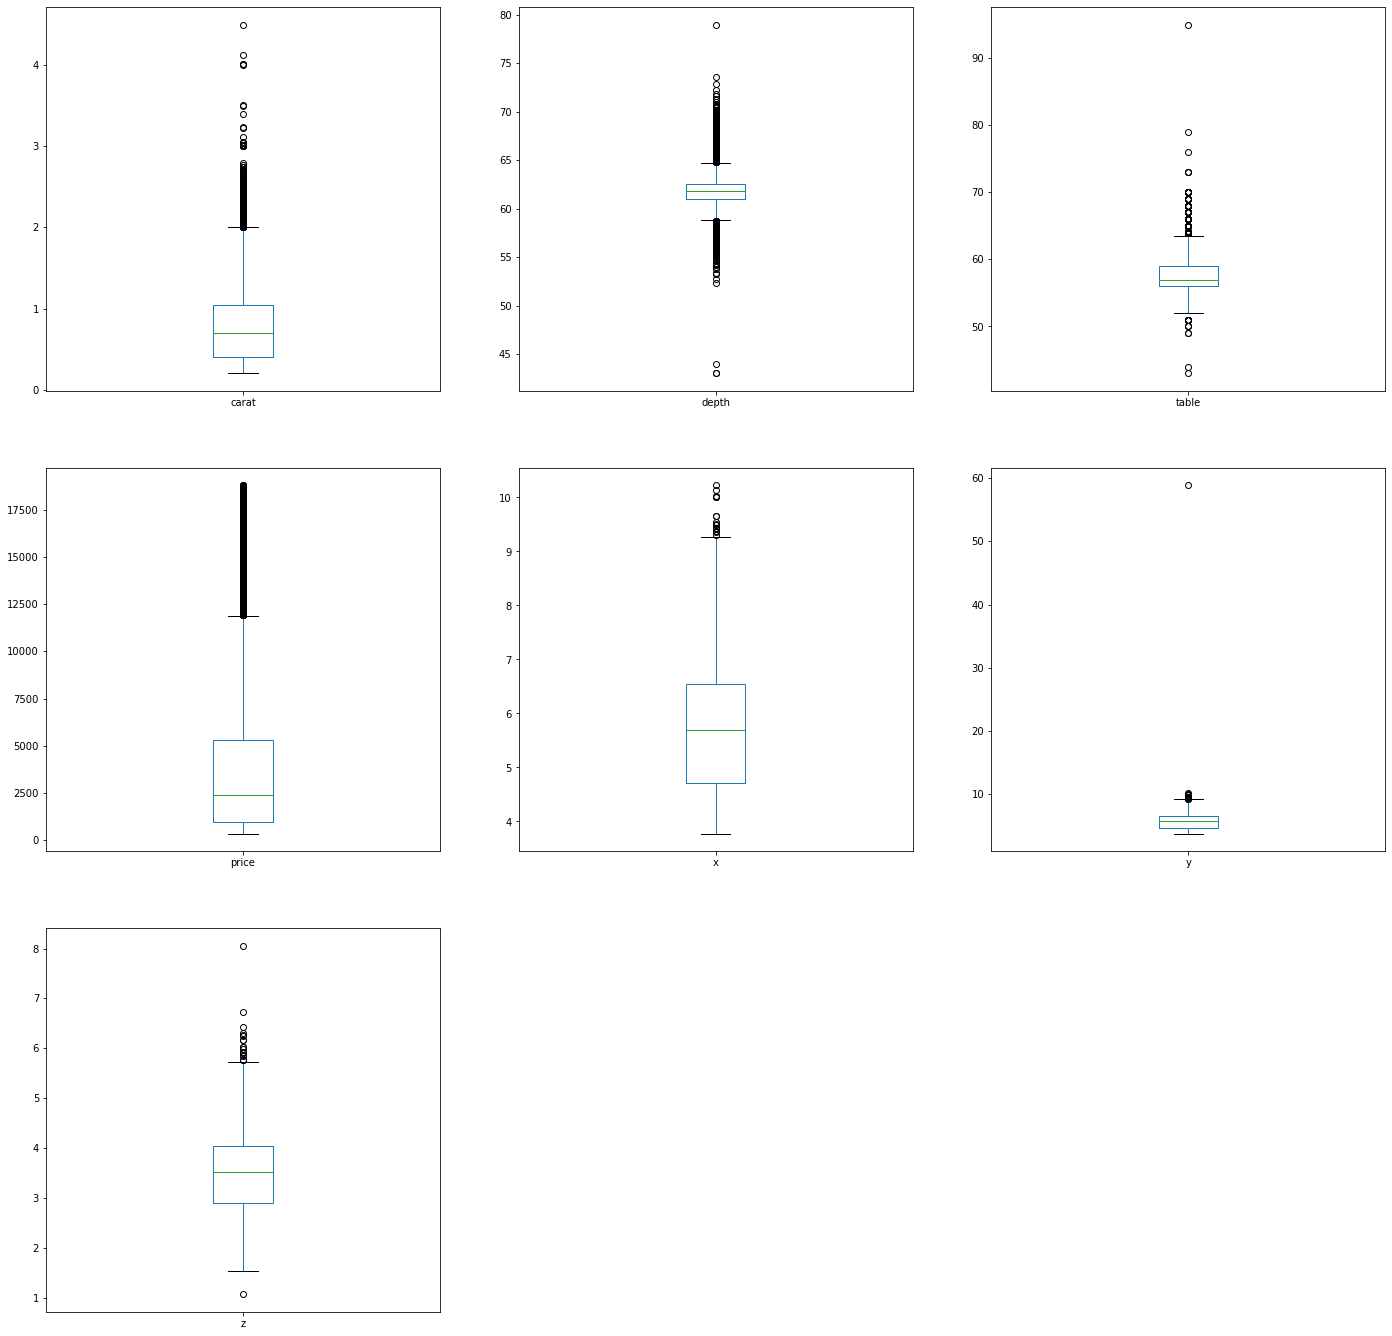

In [78]:
valid_values.plot(subplots=True, kind="box", layout=(3,3),figsize=(24,24))
# We analyse boxplot to see outliers
# only depth and table values have otuliers under the first quartile

In [84]:
above_75 = valid_values[valid_values["carat"] > 1.5]

In [85]:
above_75.sort_values(by="carat").tail()
#for each variable We analyse the extreme values and consider the possibility of eliminate those values from analysis
# although this could be, like cutting a diamond, a process in which we could loose value

,carat,cut,color,clarity,depth,table,price,x,y,z
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [87]:
above_75 = valid_values[valid_values["depth"] > 62.5]
above_75.sort_values(by="depth").tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
37042,1.02,Fair,H,VS1,71.8,56.0,4455,6.04,5.97,4.31
11967,0.96,Fair,G,SI2,72.2,56.0,2438,6.01,5.81,4.28
35969,0.90,Fair,G,SI1,72.9,54.0,2691,5.74,5.67,4.16
17770,0.99,Fair,J,I1,73.6,60.0,1789,6.01,5.80,4.35
25248,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [88]:
under_75 = valid_values[valid_values["depth"] < 61]
under_75.sort_values(by="depth").head()

,carat,cut,color,clarity,depth,table,price,x,y,z
30278,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
242,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
3205,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
33447,0.37,Fair,F,IF,52.3,61.0,1166,4.96,4.91,2.58
24512,0.56,Fair,H,VS2,52.7,70.0,1293,5.71,5.57,2.97


In [91]:
above_75 = valid_values[valid_values["table"] > 56]
above_75.sort_values(by="table").tail()
# maybe that 95% table values is wrong data

,carat,cut,color,clarity,depth,table,price,x,y,z
25248,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
6049,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
13278,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
22030,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
21603,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [92]:
under_75 = valid_values[valid_values["table"] < 59]
under_75.sort_values(by="table").head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2068,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
21300,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
18318,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
35759,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
31827,1.02,Fair,F,SI1,61.8,50.0,4227,6.59,6.51,4.05


In [93]:
above_75 = valid_values[valid_values["price"] > 5300]
above_75.sort_values(by="price").tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
618,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
25529,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
29107,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
3990,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16


In [94]:
above_75 = valid_values[valid_values["x"] > 6.5]
above_75.sort_values(by="x").tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [95]:
above_75 = valid_values[valid_values["y"] > 6.5]
above_75.sort_values(by="y").tail()
# Maybe a y with a value of 58.9 is wrong data

,carat,cut,color,clarity,depth,table,price,x,y,z
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06


In [96]:
above_75 = valid_values[valid_values["z"] > 4]
above_75.sort_values(by="z").tail()
# again a strange extreme value which had already been detected

,carat,cut,color,clarity,depth,table,price,x,y,z
20432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06


In [101]:
valid_values=data[(data["x"]>0)&(data["y"]>0)&(data["z"]>0)&(data["carat"]>0)&(data["depth"]>0)&(data["table"]>0&(data["price"]>0))]

In [105]:
valid_values2=valid_values[(valid_values["table"]<95)&(valid_values["y"]<58)]

In [106]:
display (valid_values2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [107]:
data=valid_values2
#We restrict the final dataset

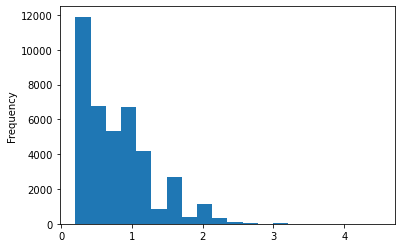

In [108]:
data['carat'].plot.hist(bins=20)
# We analyse the distribution of carat

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

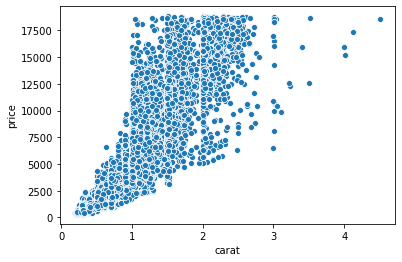

In [112]:
sns.scatterplot(data=data, x="carat", y="price")
# we see how there is a positive correlation between carat and price that seems to be more than linear

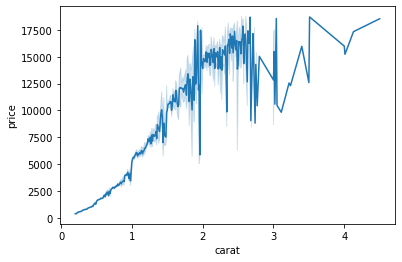

In [113]:
sns.lineplot(data=data, x="carat", y="price")
# We check again the same relationship

In [117]:
data['cut'].value_counts()
# We analyse the distribution of the "cut" variable

Ideal        16218
Premium      10250
Very Good     9095
Good          3659
Fair          1215
Name: cut, dtype: int64

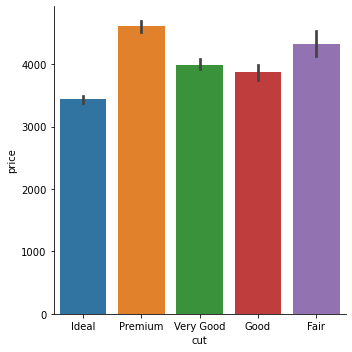

In [118]:
sns.catplot(x="cut", y="price", kind="bar", data=data, order=["Ideal","Premium", "Very Good","Good", "Fair"]);
# If we analyse the relationship between cut and price we see that the worst the quality, the higher the price
# This is due because low quality diamonds tend to be bigger

In [119]:
data["Price_per_carat"]=data["price"]/data["carat"]
# We create the variable "price per carat" to isolate this effect

C:\Users\User\anaconda3\envs\Ironhack\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


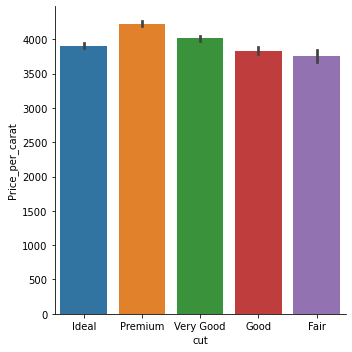

In [120]:
sns.catplot(x="cut", y="Price_per_carat", kind="bar", data=data, order=["Ideal","Premium", "Very Good","Good", "Fair"]);
# We see that now the relation is less "counter-intuitive"

In [121]:
data['color'].value_counts()
#We analyse the distribution of the "color" variable

G    8449
E    7325
F    7172
H    6271
D    5049
I    4031
J    2140
Name: color, dtype: int64

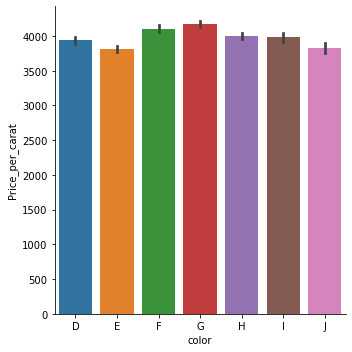

In [123]:
sns.catplot(x="color", y="Price_per_carat", kind="bar", data=data, order=["D", "E", "F","G", "H","I","J"]);
# We do not see any relationship between color and price
# maybe it is because all the colors in the database fall into the "colorless" or "near colorless" categories and...
#...this may be undetectable by buyers and , for that reason,  more difficult to be put on price

In [124]:
data.groupby('color')['Price_per_carat'].mean()
# again watching the mean price per colour we do not see any relationship

color
D    3937.805478
E    3810.101878
F    4106.246379
G    4171.345629
H    4003.812558
I    3980.126032
J    3827.670485
Name: Price_per_carat, dtype: float64

In [127]:
data['clarity'].value_counts()
#We analyse the distribution of the "clarity" variable

SI1     9746
VS2     9246
SI2     6919
VS1     6065
VVS2    3799
VVS1    2774
IF      1327
I1       561
Name: clarity, dtype: int64

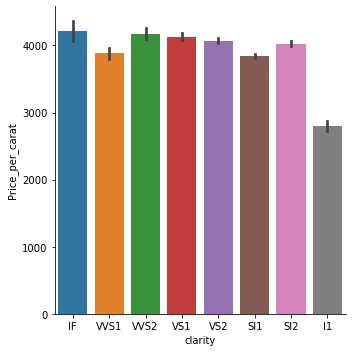

In [125]:
sns.catplot(x="clarity", y="Price_per_carat", kind="bar", data=data, order=["IF", "VVS1", "VVS2","VS1","VS2","SI1","SI2","I1"]);
# In the case of "clarity" we see a relationship: the more clear, the higher price per carat

In [132]:
data.groupby('clarity')['Price_per_carat'].mean()
#Watching the mean price per clarity we see that the lower clarity has the lower price per carat and the higher clarity has the higher price per carat

clarity
I1      2796.819349
IF      4217.324475
SI1     3843.649977
SI2     4024.559834
VS1     4128.947808
VS2     4074.288611
VVS1    3882.807337
VVS2    4178.017868
Name: Price_per_carat, dtype: float64

In [133]:
xyz=data[['x','y','z']]
# We are going to create a XYZ df to analyse relationships among dimensional variables

In [134]:
display(xyz)

,x,y,z
0,6.83,6.79,4.25
1,4.35,4.38,2.75
2,5.62,5.53,3.65
3,4.68,4.72,3.00
4,6.55,6.51,3.95
...,...,...,...
40450,7.10,7.04,4.43
40451,8.31,8.25,4.73
40452,6.37,6.42,4.01
40453,4.45,4.47,2.76


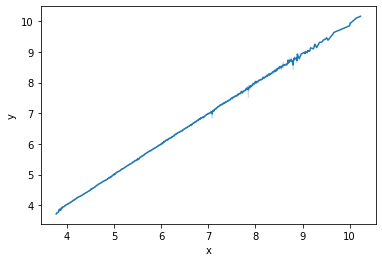

In [137]:
sns.lineplot(data=xyz, x="x", y="y")
# The linear relationship with a 45 degree slope tells us that most diamonds are rounded or squared (width and long are equal)

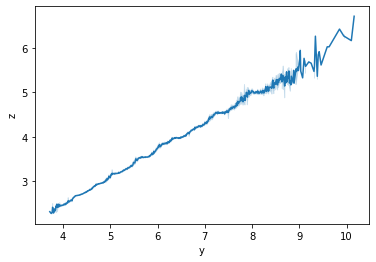

In [138]:
sns.lineplot(data=xyz, x="y", y="z")

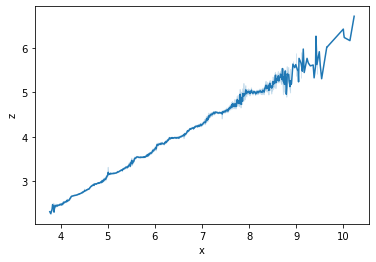

In [139]:
sns.lineplot(data=xyz, x="x", y="z")

In [140]:
display(data)

,carat,cut,color,clarity,depth,table,price,x,y,z,Price_per_carat
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,3527.272727
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,1578.125000
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,3783.098592
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,1800.000000
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,4786.274510
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,7514.925373
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,6245.049505
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,5402.970297
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,1381.818182


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            40437 non-null  float64
 1   cut              40437 non-null  object 
 2   color            40437 non-null  object 
 3   clarity          40437 non-null  object 
 4   depth            40437 non-null  float64
 5   table            40437 non-null  float64
 6   price            40437 non-null  int64  
 7   x                40437 non-null  float64
 8   y                40437 non-null  float64
 9   z                40437 non-null  float64
 10  Price_per_carat  40437 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.0+ MB


In [142]:
data.describe()

,carat,depth,table,price,x,y,z,Price_per_carat
count,40437.000000,40437.000000,40437.000000,40437.000000,40437.000000,40437.000000,40437.000000,40437.000000
mean,0.797366,61.753162,57.444625,3926.096644,5.729494,5.731519,3.538408,4001.970616
std,0.475193,1.431185,2.225286,3989.633125,1.122277,1.114012,0.693260,2009.722320
min,0.200000,43.000000,43.000000,326.000000,3.770000,3.720000,1.070000,1051.162791
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,2470.370370
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000,3492.156863
75%,1.040000,62.500000,59.000000,5328.000000,6.540000,6.540000,4.040000,4945.098039
max,4.500000,79.000000,79.000000,18823.000000,10.230000,10.160000,6.720000,17828.846154


In [143]:
data.to_csv('diamonds_clean.csv',index=False)